In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pandasql

In [3]:
from pandasql import sqldf

In [4]:
data = pd.read_csv('founders_dataset_IDP.csv')

In [5]:
data.head()

,Unnamed: 0,CB_company_uuid,legal_name,domain,city,status,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,...,job_type,first_name,last_name,gender,facebook_url,linkedin_url,twitter_url,facebook_url_exists,linkedin_url_exists,twitter_url_exists
0,10,c2d47d05-9e78-de77-084c-dd5171251ff1,"Asana, Inc.",asana.com,San Francisco,ipo,"Other,Software",13.0,4.532000e+08,4.532000e+08,...,executive,Dustin,Moskovitz,male,http://www.facebook.com/moskov,https://www.linkedin.com/in/dmoskov,http://twitter.com/moskov,1,1,1
1,31,9921555e-1f0c-9404-6e89-24bc1641085b,Xoom Corporation,xoom.com,San Francisco,acquired,"Commerce and Shopping,Financial Services,Payments",7.0,1.043490e+08,1.043490e+08,...,executive,Alan,Braverman,male,http://www.facebook.com/alanbraverman,http://www.linkedin.com/in/alanb,http://twitter.com/alanb42,1,1,1
2,45,1eb37109-3b93-01a9-177f-fee2cb1bfcdc,Uber Technologies Inc.,uber.com,San Francisco,ipo,"Apps,Mobile,Software,Transportation",33.0,2.521245e+10,2.521245e+10,...,executive,Garrett,Camp,male,http://www.facebook.com/garrettcamp,http://www.linkedin.com/in/garrettcamp,https://twitter.com/gc,1,1,1
3,67,a2e8a0ad-43ff-2039-3784-e53026415bbc,Hatchlearn Inc.,outlearn.com,Boston,closed,"Education,Software",3.0,4.049999e+06,4.049999e+06,...,executive,Will,Koffel,male,http://www.facebook.com/wkoffel,http://www.linkedin.com/in/wkoffel,http://twitter.com/wkoffel,1,1,1
4,78,4cb7db7b-0581-3c51-3ff1-8ae84a0a101e,"Barkbox, Inc.",tinyurl.com,New York,ipo,"Commerce and Shopping,Community and Lifestyle,...",6.0,2.817250e+08,2.817250e+08,...,executive,Henrik,Werdelin,male,NaN,http://www.linkedin.com/in/werdelin,http://twitter.com/werdelin,0,1,1


In [7]:
data.columns

Index(['Unnamed: 0', 'CB_company_uuid', 'legal_name', 'domain', 'city',
       'status', 'category_groups_list', 'num_funding_rounds',
       'total_funding_usd', 'total_funding', 'founded_on', 'last_funding_on',
       'employee_count', 'raised_amount_usd', 'acquiree_name', 'acquirer_name',
       'acquired_on', 'went_public_on', 'valuation_price_usd',
       'valuation_price', 'money_raised_usd', 'money_raised', 'CB_people_uuid',
       'person_name', 'started_on', 'ended_on', 'is_current', 'title',
       'job_type', 'first_name', 'last_name', 'gender', 'facebook_url',
       'linkedin_url', 'twitter_url', 'facebook_url_exists',
       'linkedin_url_exists', 'twitter_url_exists'],
      dtype='object')

In [8]:
len(data.index)

6130

In [6]:
data['facebook_url_exists'].value_counts()

0    4725
1    1405
Name: facebook_url_exists, dtype: int64

In [7]:
data['linkedin_url_exists'].value_counts()

1    6020
0     110
Name: linkedin_url_exists, dtype: int64

In [8]:
data['twitter_url_exists'].value_counts()

0    3202
1    2928
Name: twitter_url_exists, dtype: int64

In [9]:
value_exists = [1405, 2928, 6020]
platforms = ['Facebook','Twitter','LinkedIn']

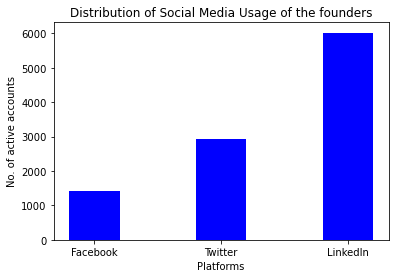

In [10]:
# creating the bar plot
plt.bar(platforms, value_exists, color ='blue',
        width = 0.4)

plt.xlabel("Platforms")
plt.ylabel("No. of active accounts")
plt.title("Distribution of Social Media Usage of the founders")
plt.show()

In [11]:
##### pandas sql to get founders with no social media

In [12]:
pysqldf = lambda q: sqldf(q, globals())

In [13]:
q = "SELECT * FROM data WHERE facebook_url_exists = '0' AND twitter_url_exists = '0' AND linkedin_url_exists = '0'"

In [14]:
no_social = pysqldf(q)

In [15]:
no_social['legal_name'].count()

83

In [16]:
no_social['gender'].value_counts()

male      70
female    13
Name: gender, dtype: int64

In [17]:
data['gender'].value_counts()

male          5373
female         753
non_binary       2
agender          1
bigender         1
Name: gender, dtype: int64

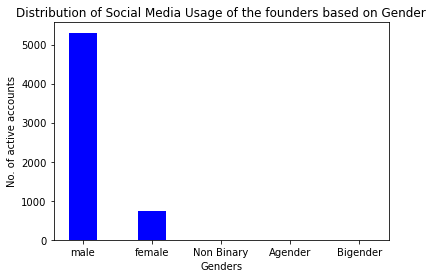

In [25]:
# creating the bar plot
gender = ['male','female','Non Binary','Agender','Bigender']
gender_counts = [5303,740,2,1,1]
plt.bar(gender, gender_counts, color='blue',
        width=0.4)

plt.xlabel("Genders")
plt.ylabel("No. of active accounts")
plt.title("Distribution of Social Media Usage of the founders based on Gender")
plt.show()


In [18]:
no_social_ratio={}
no_social_ratio['male'] = 70/5373*100
no_social_ratio['female'] = 13/753*100
print(no_social_ratio)

{'male': 1.3028103480364788, 'female': 1.7264276228419653}


In [19]:
q = "SELECT * FROM data WHERE facebook_url_exists = '0' AND twitter_url_exists = '0' AND linkedin_url_exists = '1'"
only_li = pysqldf(q)
only_li['legal_name'].count()

2928

In [20]:
q = "SELECT * FROM data WHERE facebook_url_exists = '0' AND twitter_url_exists = '1' AND linkedin_url_exists = '0'"
only_tw = pysqldf(q)
only_tw['legal_name'].count()

18

In [21]:
q = "SELECT * FROM data WHERE facebook_url_exists = '1' AND twitter_url_exists = '0' AND linkedin_url_exists = '0'"
only_tw = pysqldf(q)
only_tw['legal_name'].count()

2

In [22]:
#drop them who don't use them

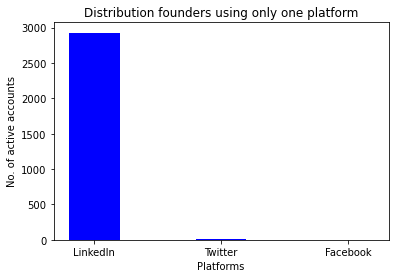

In [9]:
only_socials = ['LinkedIn','Twitter','Facebook']
counts = [2928,18,2]
plt.bar(only_socials, counts, color='blue',
        width=0.4)

plt.xlabel("Platforms")
plt.ylabel("No. of active accounts")
plt.title("Distribution founders using only one platform")
plt.show()


* 83 people in this list use no social media
* 1.3% males use no social
* 1.7% females use no social
* 2928 use only LinkedIn
* 18 use only Twitter
* 2 use only Facebook

In [23]:
data['city'].unique()

array(['San Francisco', 'Boston', 'New York', 'Cape Canaveral',
       'Costa Mesa', 'Austin', 'Menlo Park', 'Tempe', 'California City',
       'Redwood Shores', 'Reston', 'Chicago', 'Redwood City',
       'Mountain View', 'San Mateo', 'Dallas', 'Corte Madera',
       'Santa Clara', 'Waltham', 'San Jose', 'Seattle', 'San Diego',
       'Los Angeles', 'Culver City', 'South San Francisco', 'Emeryville',
       'Draper', 'Palo Alto', 'Santa Monica', 'Framingham', 'Mill Valley',
       'Sunnyvale', 'Minneapolis', 'Cambridge', 'Saint Louis',
       'Indianapolis', 'Cupertino', 'Foster City', 'Los Gatos',
       'Wilmington', 'Mamaroneck', 'Burlington', 'Pleasanton', 'Stamford',
       'Oakland', 'Somerville', 'Rochester', 'Atlanta', 'Boulder',
       'La Jolla', 'Brooklyn', 'El Segundo', 'Milpitas', 'San Carlos',
       'Durham', 'Santa Fe', 'Washington', 'Chevy Chase', 'Bedford',
       'Danvers', 'Rockville', 'Newark', 'Columbia', 'Colorado Springs',
       'Bellevue', 'Nashville', 'Fremo